DOES THE PUBLIC SENTIMENT HAVE AN EFFECT ON CRYPTOCURRENCY PRICE CHANGE?

https://github.com/uic-cs418/cs418-spring22-sixth-sense/blob/main/CS418_Sixth_Sense.ipynb

INTRODUCTION

Cryptocurrency has been a fast-growing technology that has become more widely accepted. In recent years, prices for cryptocurrency have skyrocketed and much is still not known about the causes behind these price fluctuations. Due to cryptocurrency not being controlled by any authority or being backed by any real items, its main price influence is due to the public. Thus, our project wants to explore the relation between public sentiment of cryptocurrency and whether or not it affects the price of coins.

In [1]:
import numpy as np
import pandas as pd

from functions import *

In [2]:
# Source: https://data.world/chasewillden/cryptocurrency-price-by-date-2013-february-2018
crypto_prices_df = pd.read_csv('chasewillden-cryptocurrency-price-by-date-2013-february-2018/chasewillden-cryptocurrency-price-by-date-2013-february-2018/data/cryptocurrency_prices_by_date.csv')

# Extract prices for the timeframe 01/01/2015 - 12/31/2018
# 2015-01-01 00:00:00  => 1420070400000
# 2018-12-31 23:59:59 => 1546261199000
crypto_prices_df = crypto_prices_df[(crypto_prices_df['date'] >= 1420070400000) & (crypto_prices_df['date'] <= 1546261199000)]

# Convert Unix time to Date time
crypto_prices_df['date'] = pd.to_datetime(crypto_prices_df['date'], unit='ms')
crypto_prices_df = addYearMonthAndDayColumns(crypto_prices_df)
crypto_prices_df[(crypto_prices_df['currency'] == 'bitcoin')].head()

,currency,date,price,Year,Month,Day
64769,bitcoin,2015-01-01 02:40:00,317.848,2015,1,1
64770,bitcoin,2015-01-02 00:53:20,313.639,2015,1,2
64771,bitcoin,2015-01-03 01:53:20,314.870,2015,1,3
64772,bitcoin,2015-01-04 00:06:40,281.246,2015,1,4
64773,bitcoin,2015-01-05 01:06:40,266.723,2015,1,5


In [3]:
#Source: https://edloginova.github.io/cryptodata/
news = pd.read_json('cryptodata/news.json')
reddit = pd.read_json('cryptodata/reddit.json')
bitcoinTalk = pd.read_json('cryptodata/bitcointalk.json')


In [4]:
news = news[(news['date'].dt.year >= 2015) & (news['date'].dt.year <= 2018)]
reddit = reddit[(reddit['date'].dt.year >= 2015) & (reddit['date'].dt.year <= 2018)]
bitcoinTalk = bitcoinTalk[(bitcoinTalk['date'].dt.year >= 2015) & (bitcoinTalk['date'].dt.year <= 2018)]

print(len(news))
print(len(reddit))
print(len(bitcoinTalk))

63252
2752380
1642540


In [5]:
news = addYearAndMonthColumns(news)
reddit = addYearAndMonthColumns(reddit)
bitcoinTalk = addYearAndMonthColumns(bitcoinTalk)

news.head()

,text,post_id,date,Year,Month
9698,Venture capitalist Lou Kerner says bitcoin is ...,9783,2018-12-31 23:37:58,2018,12
9699,"Charlie Lee, the creator of Litecoin and the m...",9784,2018-12-31 23:30:27,2018,12
9700,As crypto’s value has dropped across the board...,9785,2018-12-31 23:24:38,2018,12
9701,Hacks and heists have been a threat for as lon...,9786,2018-12-31 23:05:03,2018,12
9702,It’s been over a year ...,9787,2018-12-31 22:46:45,2018,12


In [6]:
popular_cryptos = ['bitcoin','ethereum', 'tether', 'binance-coin', 'cardano']
prices_of_popular_cryptos = crypto_prices_df[crypto_prices_df['currency'].isin(popular_cryptos)]

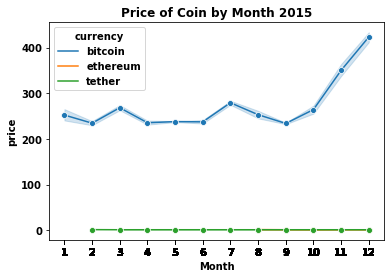

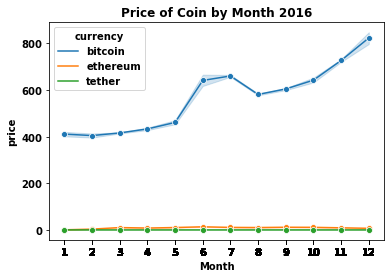

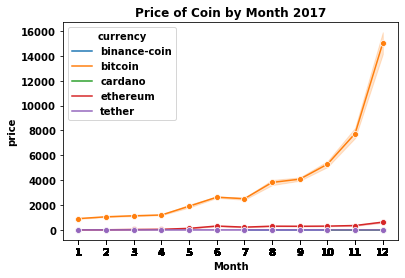

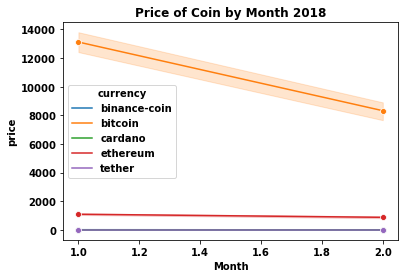

In [7]:
#plots of price per year
price_2015 = price_of_popular_cryptos_during_a_particular_year(prices_of_popular_cryptos,2015)
price_2016 = price_of_popular_cryptos_during_a_particular_year(prices_of_popular_cryptos,2016)
price_2017 = price_of_popular_cryptos_during_a_particular_year(prices_of_popular_cryptos,2017)
price_2018 = price_of_popular_cryptos_during_a_particular_year(prices_of_popular_cryptos,2018)

In [8]:
news_per_year = news.groupby(['Year']).size().to_frame('size').reset_index()
reddit_per_year = reddit.groupby(['Year']).size().to_frame('size').reset_index()
bitcoinTalk_per_year = bitcoinTalk.groupby(['Year']).size().to_frame('size').reset_index()
news_per_year.loc[-1] = [2015,0]
news_per_year.index = news_per_year.index + 1  # shifting index
news_per_year.sort_index(inplace=True) 

C:\Users\vbatch2\AppData\Local\Temp/ipykernel_16008/607749887.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


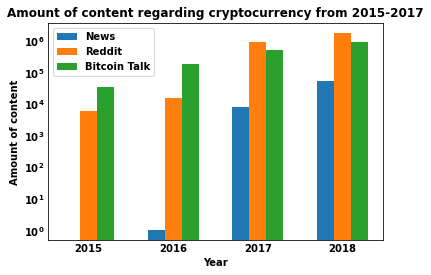

In [9]:
fig,ax = plt.subplots()
index = np.arange(max(len(reddit_per_year['Year']), len(news_per_year['Year']), len(bitcoinTalk_per_year['Year'])))
bar_width = 0.2
opacity = 0.8

ax.bar(index-bar_width, news_per_year['size'], width=bar_width, label='News')
ax.bar(index, reddit_per_year['size'], width=bar_width, label='Reddit')
ax.bar(index+bar_width, bitcoinTalk_per_year['size'], width=bar_width, label='Bitcoin Talk')
ax.set_yscale('log')
ax.tick_params(axis=u'both', which=u'both',length=0)
labels = ['','2015','','2016','','2017','','2018','']
ax.set_xticklabels(labels)

plt.xlabel('Year')
plt.ylabel('Amount of content')
plt.title('Amount of content regarding cryptocurrency from 2015-2017')
plt.legend(loc='best')

plt.show()

In [10]:
news = sentiment_analysis(news)

In [11]:
popular_cryptos2 = ['bitcoin','ethereum', 'tether']
news_of_popular_cryptos2 = news[news['crypto'].isin(popular_cryptos2)]


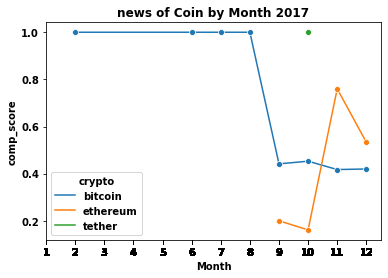

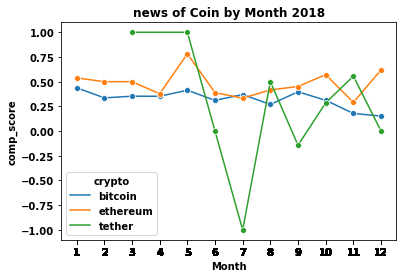

In [12]:
#plots of sentiment per year
news_2017 = sentiment_of_popular_cryptos_during_a_particular_year(2017,news_of_popular_cryptos2)
news_2018 = sentiment_of_popular_cryptos_during_a_particular_year(2018,news_of_popular_cryptos2)

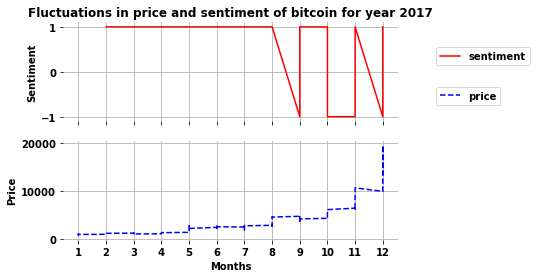

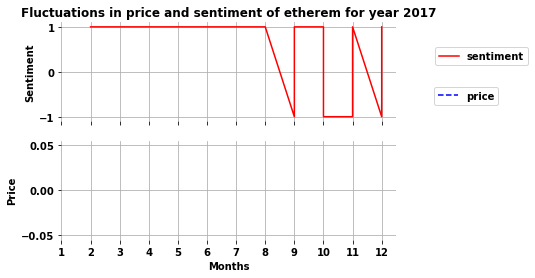

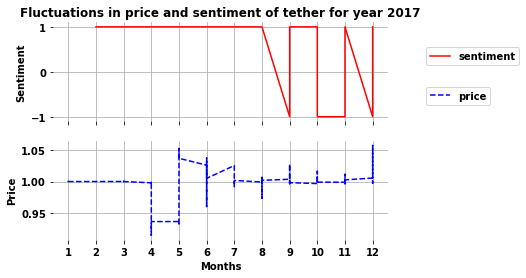

In [13]:
sentiment_price_of_popular_cryptos_during_a_particular_year(2017,'bitcoin',news, crypto_prices_df)
sentiment_price_of_popular_cryptos_during_a_particular_year(2017,'etherem',news, crypto_prices_df)
sentiment_price_of_popular_cryptos_during_a_particular_year(2017,'tether',news, crypto_prices_df)

In [14]:
crypto_prices_df = price_extraction(crypto_prices_df)

In [15]:
# reddit = sentiment_analysis(reddit)

In [17]:
news = comp_score(news)
# reddit = comp_score(reddit)
# bitcoinTalk = comp_score(bitcoinTalk)

In [18]:
news_reddit = news.append(reddit, ignore_index=True)
news_reddit_bitcoin = news_reddit.append(bitcoinTalk, ignore_index=True)

In [19]:
price_sentiment = pd.merge(crypto_prices_df,news_reddit_bitcoin,on='Date_extracted')

In [20]:
x_train, x_test, y_train, y_test= train_test_split(price_sentiment['comp_score'], price_sentiment['price_raise/drop'])